In [2]:
import requests
import pandas as pd
import time

# API setup
BASE_URL = "https://newsapi.org/v2/"
NEWS_API_KEY = "2fc2a2999ef544eba64f07e060f086b4"

# Function to fetch top headlines
def fetch_top_headlines(country='us', category='general'):
    endpoint = f"{BASE_URL}top-headlines"
    params = {
        'apiKey': NEWS_API_KEY,
        'country': country,
        'category': category
    }
    response = requests.get(endpoint, params=params)
    if response.status_code == 200:
        return response.json()['articles']
    else:
        print("Failed to fetch data:", response.status_code, response.text)
        return []

# Fetch data and create DataFrame
def get_news_dataframe(country='us', category='general'):
    articles = fetch_top_headlines(country, category)
    if articles:
        df = pd.DataFrame(articles)
        # Select relevant columns
        df = df[['source', 'author', 'title', 'description', 'url', 'publishedAt']]
        df['source'] = df['source'].apply(lambda x: x['name'])  # Extract source name
        return df
    else:
        return pd.DataFrame()

# Fetch and display data
news_df = get_news_dataframe()
if not news_df.empty:
    print(news_df.head())
else:
    print("No news data fetched.")


                source           author  \
0              Reuters          Reuters   
1             BBC News             None   
2              Reuters  Lewis Krauskopf   
3               Forbes      Zak Doffman   
4  The Washington Post       Matt Viser   

                                               title  \
0  Russian missile strike on Sumy kills 11, injur...   
1  ATACMS: How long-range missiles striking Russi...   
2  Headwinds hit Trump-fueled rally in US stocks ...   
3  Google’s Gmail Decision—Why You Need A New Ema...   
4  Biden visits Amazon rainforest, a first for an...   

                                         description  \
0  Two children were among 11 people killed when ...   
1  The US has never allowed Kyiv to use long-rang...   
2  A U.S. stock rally fueled by Donald Trump’s el...   
3  A huge update for 2 billion Gmail users has su...   
4  Biden’s emphasis on climate change during his ...   

                                                 url           publ

In [3]:
news_df.head()

,source,author,title,description,url,publishedAt
0,Reuters,Reuters,"Russian missile strike on Sumy kills 11, injur...",Two children were among 11 people killed when ...,https://www.reuters.com/world/europe/two-child...,2024-11-18T07:21:00Z
1,BBC News,None,ATACMS: How long-range missiles striking Russi...,The US has never allowed Kyiv to use long-rang...,https://www.bbc.com/news/articles/cx2nrlq1840o,2024-11-18T07:19:38Z
2,Reuters,Lewis Krauskopf,Headwinds hit Trump-fueled rally in US stocks ...,A U.S. stock rally fueled by Donald Trump’s el...,https://www.reuters.com/markets/us/headwinds-h...,2024-11-18T07:08:00Z
3,Forbes,Zak Doffman,Google’s Gmail Decision—Why You Need A New Ema...,A huge update for 2 billion Gmail users has su...,https://www.forbes.com/sites/zakdoffman/2024/1...,2024-11-18T05:54:00Z
4,The Washington Post,Matt Viser,"Biden visits Amazon rainforest, a first for an...",Biden’s emphasis on climate change during his ...,https://www.washingtonpost.com/politics/2024/1...,2024-11-18T05:52:30Z


In [4]:
# Function to clean the DataFrame
def clean_news_dataframe(df):
    # Drop rows with any missing values in the key columns
    df = df.dropna(subset=['source', 'author', 'title', 'description', 'url'])
    
    # Remove rows containing placeholder values like "[Removed]"
    placeholder_values = ['[Removed]', 'None']
    for col in ['source', 'author', 'title', 'description']:
        df = df[~df[col].isin(placeholder_values)]
    
    return df

# Clean the news DataFrame
cleaned_news_df = clean_news_dataframe(news_df)

# Display the cleaned DataFrame
if not cleaned_news_df.empty:
    print(cleaned_news_df.head())
else:
    print("No valid news data after cleaning.")

                source           author  \
0              Reuters          Reuters   
2              Reuters  Lewis Krauskopf   
3               Forbes      Zak Doffman   
4  The Washington Post       Matt Viser   
5        Cointelegraph     Martin Young   

                                               title  \
0  Russian missile strike on Sumy kills 11, injur...   
2  Headwinds hit Trump-fueled rally in US stocks ...   
3  Google’s Gmail Decision—Why You Need A New Ema...   
4  Biden visits Amazon rainforest, a first for an...   
5  Google’s AI chatbot tells student needing help...   

                                         description  \
0  Two children were among 11 people killed when ...   
2  A U.S. stock rally fueled by Donald Trump’s el...   
3  A huge update for 2 billion Gmail users has su...   
4  Biden’s emphasis on climate change during his ...   
5  Google’s Gemini AI chatbot caused controversy ...   

                                                 url           publ

In [5]:
cleaned_news_df.head()

,source,author,title,description,url,publishedAt
0,Reuters,Reuters,"Russian missile strike on Sumy kills 11, injur...",Two children were among 11 people killed when ...,https://www.reuters.com/world/europe/two-child...,2024-11-18T07:21:00Z
2,Reuters,Lewis Krauskopf,Headwinds hit Trump-fueled rally in US stocks ...,A U.S. stock rally fueled by Donald Trump’s el...,https://www.reuters.com/markets/us/headwinds-h...,2024-11-18T07:08:00Z
3,Forbes,Zak Doffman,Google’s Gmail Decision—Why You Need A New Ema...,A huge update for 2 billion Gmail users has su...,https://www.forbes.com/sites/zakdoffman/2024/1...,2024-11-18T05:54:00Z
4,The Washington Post,Matt Viser,"Biden visits Amazon rainforest, a first for an...",Biden’s emphasis on climate change during his ...,https://www.washingtonpost.com/politics/2024/1...,2024-11-18T05:52:30Z
5,Cointelegraph,Martin Young,Google’s AI chatbot tells student needing help...,Google’s Gemini AI chatbot caused controversy ...,https://cointelegraph.com/news/google-ai-chatb...,2024-11-18T05:48:37Z


In [6]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests


In [7]:
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze the sentiment of articles
def analyze_sentiment(articles):
    # Create a DataFrame to store results
    sentiment_data = []

    for article in articles:
        # Get the title and description
        title = article.get("title", "")
        description = article.get("description", "")

        # Combine title and description for better analysis
        text = title + " " + description

        # Get the sentiment score using VADER
        sentiment_score = analyzer.polarity_scores(text)
        
        # Determine sentiment label based on the score
        sentiment_label = "Neutral"
        if sentiment_score['compound'] >= 0.05:
            sentiment_label = "Positive"
        elif sentiment_score['compound'] <= -0.05:
            sentiment_label = "Negative"

        # Append results to the list
        sentiment_data.append({
            'title': title,
            'description': description,
            'sentiment_score': sentiment_score['compound'],
            'sentiment_label': sentiment_label
        })

    # Create a DataFrame for better visualization and analysis
    sentiment_df = pd.DataFrame(sentiment_data)
    return sentiment_df

In [8]:
def get_news(topic=None, category=None):
    if topic:
        # Fetch news articles based on the topic
        response = requests.get(f"{BASE_URL}everything", params={
            'q': topic,
            'apiKey': NEWS_API_KEY,
            'language': 'en',
            'sortBy': 'relevancy'
        })
    elif category:
        # Fetch top headlines based on the selected category
        response = requests.get(f"{BASE_URL}top-headlines", params={
            'apiKey': NEWS_API_KEY,
            'country': 'us',  # You can change the country if needed
            'category': category,
            'language': 'en'
        })
    else:
        # Fetch general top headlines if no topic or category is provided
        response = requests.get(f"{BASE_URL}top-headlines", params={
            'apiKey': NEWS_API_KEY,
            'country': 'us',  # You can change the country if needed
            'category': 'general'
        })

    articles = response.json().get('articles', [])
    return articles

In [9]:
# Example: Fetch the latest news articles
articles = get_news(topic="technology")  # You can choose any topic/category

# Analyze sentiment of the fetched articles
sentiment_df = analyze_sentiment(articles)

# Display the results
sentiment_df.head()


,title,description,sentiment_score,sentiment_label
0,How Researchers Are Using Geospatial Technolog...,Thousands of hidden graves contain the bodies ...,-0.6486,Negative
1,[Removed],[Removed],0.0000,Neutral
2,What Are Hall Effect Sensors and How Do They W...,More and more keyboards and video game control...,0.0000,Neutral
3,A Lost Mayan City Has Been Found With Laser Ma...,Archaeologists have revealed an ancient lost M...,-0.3818,Negative
4,"Lost Maya City, Including Pyramids, Discovered...",Lidar technology has revealed extensive Maya i...,-0.3182,Negative


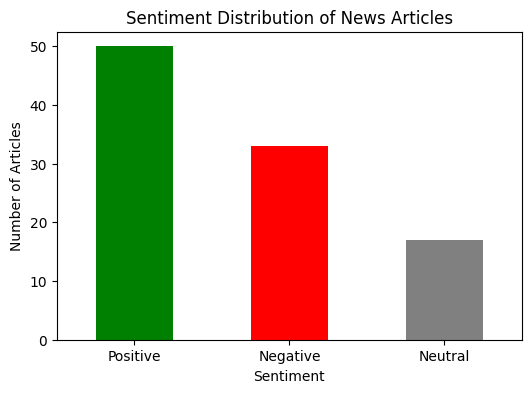

In [10]:
# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sentiment_counts = sentiment_df['sentiment_label'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title("Sentiment Distribution of News Articles")
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.xticks(rotation=0)
plt.show()
